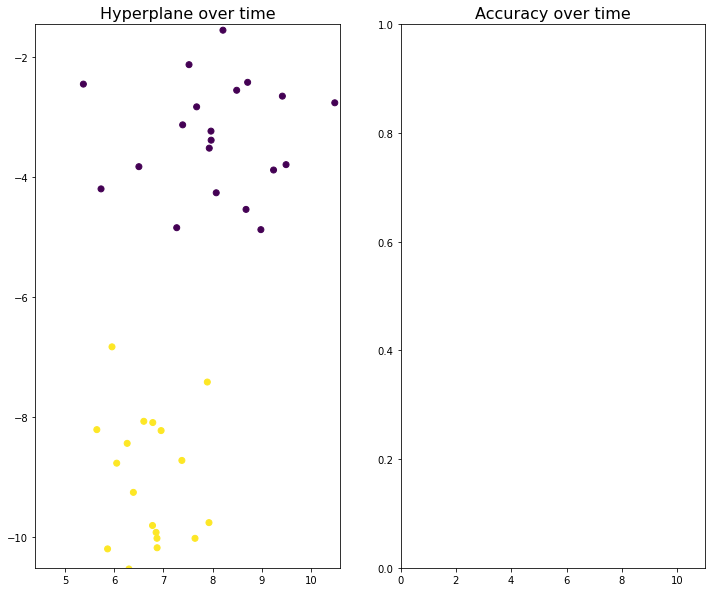

usage: ipykernel_launcher.py [-h] [-test] [-easy] [-hard]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\woutd\AppData\Roaming\jupyter\runtime\kernel-e356da3b-62f8-46a0-8c85-eef64e68b8d3.json


SystemExit: 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from sklearn.datasets import make_classification, make_blobs

def load_hard_data(n_samples=50):
    X, y = make_blobs(centers=[[1, 1], [-1, -1]], cluster_std=[1.3, 1.3], n_samples=n_samples)
    y = y * 2 - 1
    X = np.c_[np.ones(n_samples), X[:, 0], X[:, 1]]
    return X, y


def load_easy_data(n_samples=40):
    X, y = make_blobs(n_samples=n_samples, centers=2, random_state=6)
    y = y * 2 - 1
    X = np.c_[np.ones(n_samples), X[:, 0], X[:, 1]]
    return X, y

    
class PerceptronClassifier():

    def __init__(self):
        self.w = None
        
    def fit(self, X, y, maxiter=1<<16, w=None):
        """
        Implement Pocket Perceptron learning algorithm - run for at most maxiter iterations and store best w found as well as the training history 
        
        Args:
        X: numpy array shape (n,d) - training data (the first column of X will be ones)
        y: numpy array shape (n,) - training labels (each y is in {-1, +1}
        maxiter: int, maximum number of iterations to run
        w: numpy array shape (d,) - inital w if desired
        
        Stores:
        w: numpy array shape (d,) the best w found.
        history: list of (w, x, y, acc) - algorithm history so we can animate the algorithm and see what it does: For each iteration of the algorithm store w, the misclassified point x and label y used to update w, and the current score. Remember to store the last w after the iteration is done as well, set x, y to None for that entry. See the commented code for help
    
        """
        if w is None:
            w = np.zeros(X.shape[1])       
        bestw = w
        L = []
        # L.append((w.copy(), _x.copy(), _y.copy(), cur_score)) # to store current update (before w is updated)
        ### YOUR CODE
        besterr = float('inf')
        for _ in range(maxiter):
            hy = np.sign(np.dot(X, w))
            bad = (hy != y).nonzero()[0]
            if len(bad) < besterr:
                bestw = w
                besterr = len(bad)
            if len(bad) == 0:
                break
            idx = np.random.choice(bad)
            _x = X[idx]
            _y = y[idx]
            cur_score = (hy == y).mean()
            L.append((w.copy(), _x.copy(), _y.copy(), cur_score))
            w = w + _y * _x
        L.append((w.copy(), None, None, (np.sign(np.dot(X, w))==y).mean()))
        ### END CODE
        # L.append((w.copy(), None, None, cur_score)) # to store final w
        self.w = bestw
        self.history = L

    def predict(self, X):
        """ predict function for classifier
        Args:
          X, the input data - numpy array,  shape (n,d)

        Returns
          pred, the predictions - numpy array,  shape (n,), (prediction values is in {-1, +1})
        """
        pred = None
        ### YOUR CODE HERE 1-2 lines
        pred = np.sign(X@self.w)
        ### END CODE
        return pred

    def score(self, X, y):
        """ Return accuracy of model on data X with labels y (accuracy is 1/n sum_x,y 1_{x=y)
        
        Args:
          X (numpy array shape n, d)
        returns
          score - classifier accuracy (not error) on data X with labels y (float)
        """
        score = 0 
        ### YOUR CODE HERE 1-3 lines
        score = (self.predict(X)==y).mean()
        ### END CODE
        return score
    
        

def test_pla_train(n_samples=10):
    """ Test function for pla train """
    from sklearn.datasets import make_blobs
    print('Test perceptron classifier on random blobs - should be very linearly separable')
    centers = [(-10, -10), (10, 10)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.2,
                  centers=centers, shuffle=False, random_state=42)
    y = y * 2 - 1
    X = np.c_[np.ones(n_samples), X[:, 0], X[:, 1]]
    classifier = PerceptronClassifier()
    classifier.fit(X, y)
    assert np.all(classifier.predict(X) == y), 'all predictions should be correct'
    print('test completed')
    fig, ax = plt.subplots(1, 1, figsize=(13, 10))
    ax.scatter(X[:, 1], X[:, 2], c=y, s=20)
    h_from, h_to = make_hyperplane(classifier.w, ax)
    ax.plot(h_from, h_to, 'k--')
    ax.set_title('easy data set')
    plt.show()
    return X, y
    
def make_hyperplane(w, ax):
    """ 
    Compute the hyperplane (line) w0 + w1*x1 + w2*x2 = 0 in the range R = [xmin,xmax] times [ymin,ymax] for a generic w = (w0,w1,w2).
    Copy the code from the notebook
 
    Remember to handle possible special cases! 
    
    Args:
    w: numpy array shape (d,)
    ax: axis object (to plot on)
    return x, y
    """
    if w[1]==0 and w[2]==0:
        return None, None
    # Notice that w1 and w2 are not allowed to be 0 simultaneously, but it may be the case that one of them equals 0
    
    xmin, xmax, ymin, ymax = ax.axis()
    
    # Write the code here to create two NumPy arrays called x and y.
    # The arrays x and y will contain the x1's and x2's coordinates of the two endpoints of the line, respectively.
    
    x = np.array((0,1))
    y = np.array((0,1))
    
    ### YOUR CODE HERE 4-8 lines
    if w[2] == 0:
        x = np.array([-w[0]/w[1], -w[0]/w[1]])
        y = np.array([ymin, ymax])
    else:
        x = np.array([xmin, xmax])    
        y = (-w[0]-w[1]*x)/w[2]
    ### END CODE
    
    return x, y
    
def run_animation(X, y):

    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    
    ax[0].scatter(X[:, 1], X[:, 2], c=y)    
    h_line, = ax[0].plot([], [], 'k--', linewidth=4)
    p_line, = ax[0].plot([], [], 'ko', markersize=10)

    p = PerceptronClassifier()
    maxiter = 30
    p.fit(X, y, maxiter=maxiter)
    hist = p.history
    scores = np.array([x[-1] for x in hist])
    rid = np.array(list(range(len(hist))))
    #print(rid)
    #print('scores', scores)
    sc_line, = ax[1].plot([], [], 'r-x', linewidth=4, label='w over time')
    #print(sc_line)

    ax[1].set_xlim(0, len(hist)+1)
    ax[1].set_ylim(0, 1)
    ax[1].set_title('Accuracy over time', fontsize=16)
    ax[0].set_title('Hyperplane over time', fontsize=16)
    ax[0].set_xlim(X[:, 1].min() + 0.1, X[:, 1].max() + 0.1)
    ax[0].set_ylim(X[:, 2].min() + 0.1, X[:, 2].max() + 0.1)

    
    def init():  # only required for blitting to give a clean slate.
        ax[0].plot()
        ax[1].plot()
        h_line.set_data([], [])
        sc_line.set_data([], [])
        p_line.set_data([], [])
        return [h_line, p_line, sc_line]


    def animate(i):
        if i >= len(hist):
            return [h_line, sc_line]
        cur = hist[i]
        wh = cur[0]
        x = cur[1]
        h_from, h_to = make_hyperplane(wh, ax[0])
        #print(wh)
        h_line.set_data(h_from, h_to)
        sc_line.set_data(rid[0:i+1],  scores[0:i+1])
        if x is not None:
            p_line.set_data(x[1], x[2])
        else:
            p_line.set_data([], [])
            h_from_final, h_to_final = make_hyperplane(p.w, ax[0])
            ax[0].plot(h_from_final, h_to_final, 'g--', linewidth=4, label='Best w')
            ax[0].legend(fontsize=12)
        return [h_line, p_line, sc_line]


    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(hist)), interval=700, blit=False, repeat=False)
    
    plt.show()
    
X, y = load_easy_data()
run_animation(X, y)

if __name__=='__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('-test', action='store_true', default=False)
    parser.add_argument('-easy', action='store_true', default=False)
    parser.add_argument('-hard', action='store_true', default=False)
    
    
    args = parser.parse_args()
    if args.test:
        test_pla_train()
    if args.easy:
        X, y = load_easy_data()
        run_animation(X, y)
    if args.hard:
        X, y = load_hard_data(200)
        run_animation(X, y)